<a href="https://colab.research.google.com/github/Mburu-Elvis/mnist_fashion-classificaton/blob/main/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pre-trained models


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Libraries

In [ ]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

%tensorflow_version 2.x
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import cv2
import json
import requests
from tqdm import tqdm

print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


## Building and Deploying an Apparel Classifier

We'll be using the in-built Fashion MNIST dataset
It hass 60,000 training set and 10,000 test set


It has 10 label/classes.

We want to classify clothing in accordance to its class

## Loading the dataset

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Skirt', 'Sneaker', 'Bag', 'Ankle boot']

print('\nTrain_images.shape: {} of {}'.format(train_images.shape, train_images.dtype))
print('Test_images.shape: {} of {}'.format(test_images.shape, test_images.dtype))


Train_images.shape: (60000, 28, 28) of uint8
Test_images.shape: (10000, 28, 28) of uint8


## Training a simple CNN

### Reshaping the Image data for Modelling

In [ ]:
train_images_gr = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images_gr = test_images.reshape(test_images.shape[0], 28, 28, 1)


print('Train_images.shape: {} of {}'.format(train_images_gr.shape, train_images_gr.dtype))
print('Test_images.shape: {} of {}'.format(test_images_gr.shape, test_images_gr.dtype))

Train_images.shape: (60000, 28, 28, 1) of uint8
Test_images.shape: (10000, 28, 28, 1) of uint8


## Visualize some images

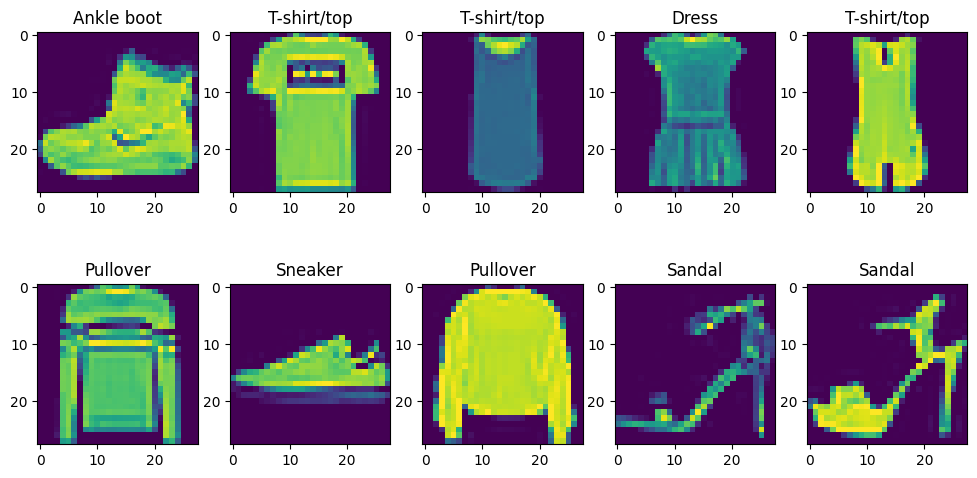

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(12,6))
c = 0
for i in range(10):
  idx = i // 5
  idy = i % 5
  ax[idx, idy].imshow(train_images_gr[i].reshape(28, 28))
  ax[idx, idy].set_title(class_names[train_labels[i]])


## Build a CNN Architecture

In [ ]:
from ast import In
# define input shape
INPUT_SHAPE = (28, 28, 1)

# define sequential model
model = tf.keras.Sequential()

# define conv-pool layers set 1
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1),
                                 activation='relu', padding='valid', input_shape = INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1),
                          activation='relu', padding='valid', input_shape = INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

# add outplut layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))

# compile the model
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

# viem model layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_1 (Dense)             (None, 256)              

## Model Training

In [ ]:
EPOCHS = 100
train_images_scaled = train_images_gr / 255.
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2,
                                               restore_best_weights=True,
                                               verbose=1)

history = model.fit(train_images_scaled, train_labels,
                    batch_size=32,
                    callbacks=es_callback,
                    validation_split=0.1,
                    epochs=EPOCHS,
                    verbose=1)

Epoch 1/100
1688/1688 [==============================] - 48s 27ms/step - loss: 0.5441 - accuracy: 0.7997 - val_loss: 0.3605 - val_accuracy: 0.8680
Epoch 2/100
1688/1688 [==============================] - 43s 26ms/step - loss: 0.3610 - accuracy: 0.8684 - val_loss: 0.3159 - val_accuracy: 0.8807
Epoch 3/100
1688/1688 [==============================] - 45s 27ms/step - loss: 0.3104 - accuracy: 0.8859 - val_loss: 0.2980 - val_accuracy: 0.8885
Epoch 4/100
1688/1688 [==============================] - 43s 26ms/step - loss: 0.2822 - accuracy: 0.8953 - val_loss: 0.2788 - val_accuracy: 0.8960
Epoch 5/100
1688/1688 [==============================] - 43s 26ms/step - loss: 0.2584 - accuracy: 0.9036 - val_loss: 0.2761 - val_accuracy: 0.8985
Epoch 6/100
1688/1688 [==============================] - 43s 26ms/step - loss: 0.2394 - accuracy: 0.9103 - val_loss: 0.2686 - val_accuracy: 0.9007
Epoch 7/100
1688/1688 [==============================] - 43s 25ms/step - loss: 0.2240 - accuracy: 0.9164 - val_loss: 0

In [ ]:
model.save("model.hdf5")